In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\road_accident_dataset.csv')
df = data.copy()
df.head()

,Country,Year,Month,Day of Week,Time of Day,Urban/Rural,Road Type,Weather Conditions,Visibility Level,Number of Vehicles Involved,...,Number of Fatalities,Emergency Response Time,Traffic Volume,Road Condition,Accident Cause,Insurance Claims,Medical Cost,Economic Loss,Region,Population Density
0,USA,2002,October,Tuesday,Evening,Rural,Street,Windy,220.414651,1,...,2,58.625720,7412.752760,Wet,Weather,4,40499.856982,22072.878502,Europe,3866.273014
1,UK,2014,December,Saturday,Evening,Urban,Street,Windy,168.311358,3,...,1,58.041380,4458.628820,Snow-covered,Mechanical Failure,3,6486.600073,9534.399441,North America,2333.916224
2,USA,2012,July,Sunday,Afternoon,Urban,Highway,Snowy,341.286506,4,...,4,42.374452,9856.915064,Wet,Speeding,4,29164.412982,58009.145124,South America,4408.889129
3,UK,2017,May,Saturday,Evening,Urban,Main Road,Clear,489.384536,2,...,3,48.554014,4958.646267,Icy,Distracted Driving,3,25797.212566,20907.151302,Australia,2810.822423
4,Canada,2002,July,Tuesday,Afternoon,Rural,Highway,Rainy,348.344850,1,...,4,18.318250,3843.191463,Icy,Distracted Driving,8,15605.293921,13584.060759,South America,3883.645634


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  object 
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  object 
 3   Day of Week                  132000 non-null  object 
 4   Time of Day                  132000 non-null  object 
 5   Urban/Rural                  132000 non-null  object 
 6   Road Type                    132000 non-null  object 
 7   Weather Conditions           132000 non-null  object 
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  object 
 12  Driver Gender                132000 non-null  object 
 13 

In [4]:
df.isnull().sum()

Country                        0
Year                           0
Month                          0
Day of Week                    0
Time of Day                    0
Urban/Rural                    0
Road Type                      0
Weather Conditions             0
Visibility Level               0
Number of Vehicles Involved    0
Speed Limit                    0
Driver Age Group               0
Driver Gender                  0
Driver Alcohol Level           0
Driver Fatigue                 0
Vehicle Condition              0
Pedestrians Involved           0
Cyclists Involved              0
Accident Severity              0
Number of Injuries             0
Number of Fatalities           0
Emergency Response Time        0
Traffic Volume                 0
Road Condition                 0
Accident Cause                 0
Insurance Claims               0
Medical Cost                   0
Economic Loss                  0
Region                         0
Population Density             0
dtype: int

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,132000.0,2011.973348,7.198624,2000.000000,2006.000000,2012.000000,2018.000000,2024.000000
Visibility Level,132000.0,275.038776,129.923625,50.001928,162.338860,274.672990,388.014111,499.999646
Number of Vehicles Involved,132000.0,2.501227,1.117272,1.000000,2.000000,3.000000,3.000000,4.000000
Speed Limit,132000.0,74.544068,26.001448,30.000000,52.000000,74.000000,97.000000,119.000000
Driver Alcohol Level,132000.0,0.125232,0.072225,0.000002,0.062630,0.125468,0.187876,0.249999
Driver Fatigue,132000.0,0.500576,0.500002,0.000000,0.000000,1.000000,1.000000,1.000000
Pedestrians Involved,132000.0,1.000773,0.816304,0.000000,0.000000,1.000000,2.000000,2.000000
Cyclists Involved,132000.0,0.998356,0.817764,0.000000,0.000000,1.000000,2.000000,2.000000
Number of Injuries,132000.0,9.508205,5.774366,0.000000,5.000000,9.000000,15.000000,19.000000
Number of Fatalities,132000.0,1.995439,1.412974,0.000000,1.000000,2.000000,3.000000,4.000000


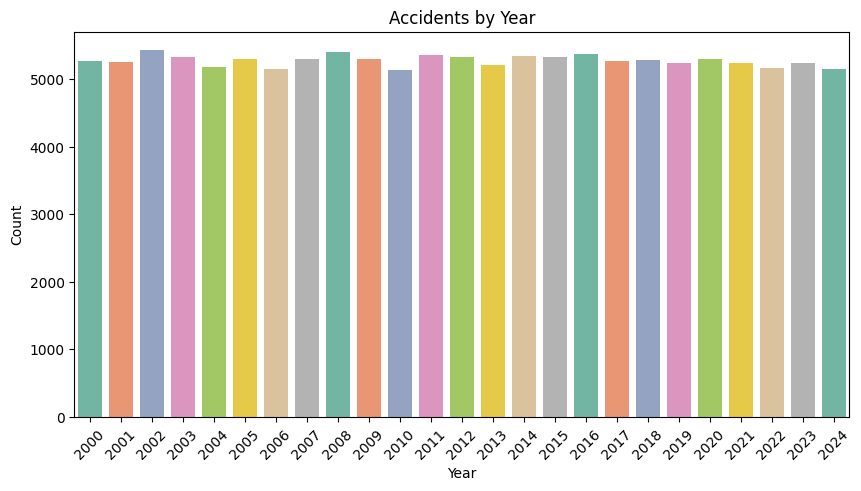

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Year'], palette="Set2")
plt.title("Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

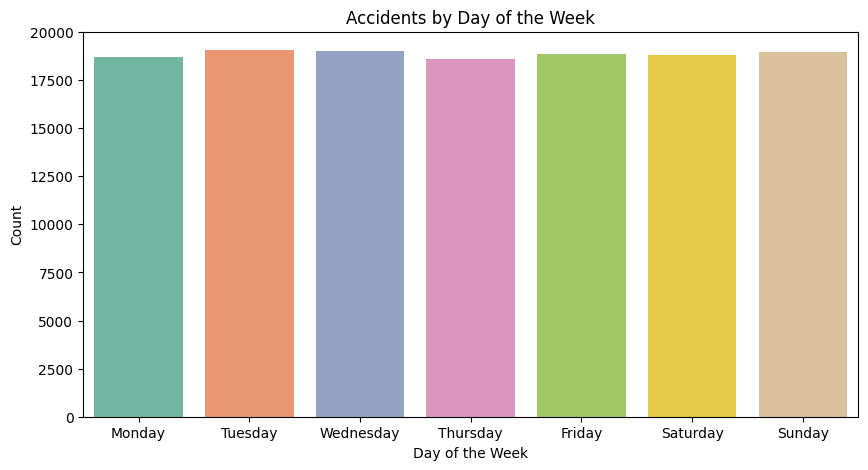

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Day of Week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="Set2")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

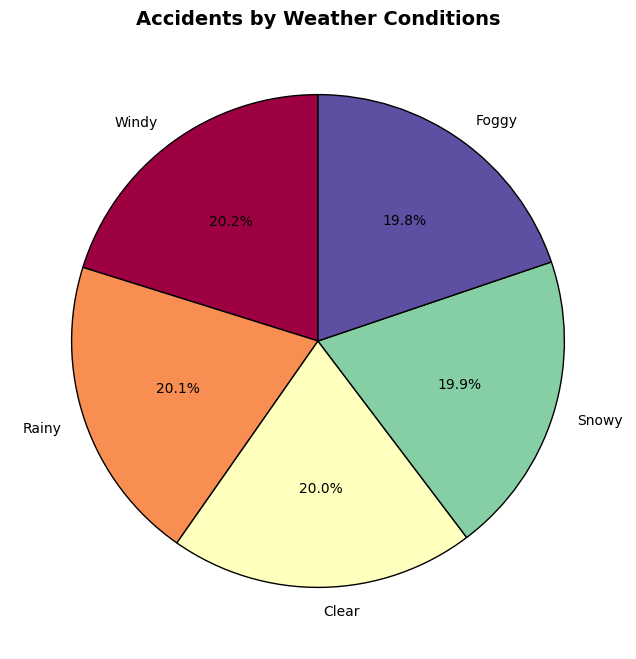

In [8]:
plt.figure(figsize=(8, 8))
df['Weather Conditions'].value_counts().plot.pie(autopct="%1.1f%%", cmap="Spectral", startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Accidents by Weather Conditions", fontsize=14, fontweight='bold')
plt.ylabel("")
plt.show()

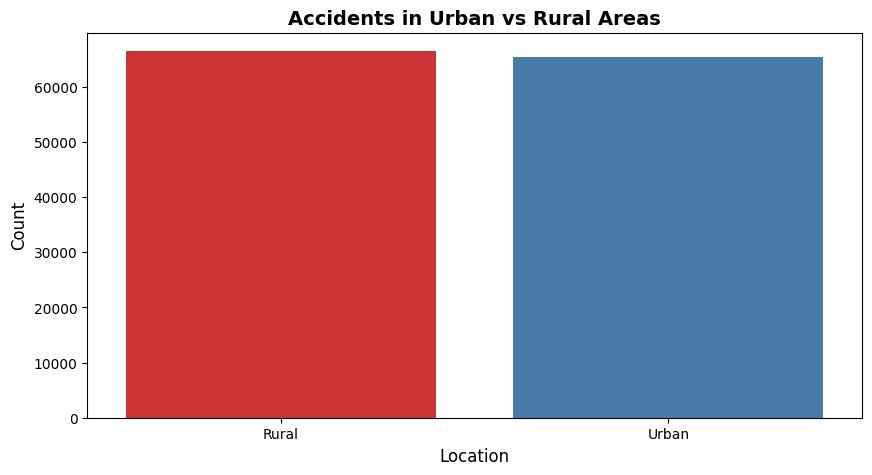

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Urban/Rural"], palette="Set1")
plt.title("Accidents in Urban vs Rural Areas", fontsize=14, fontweight='bold')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

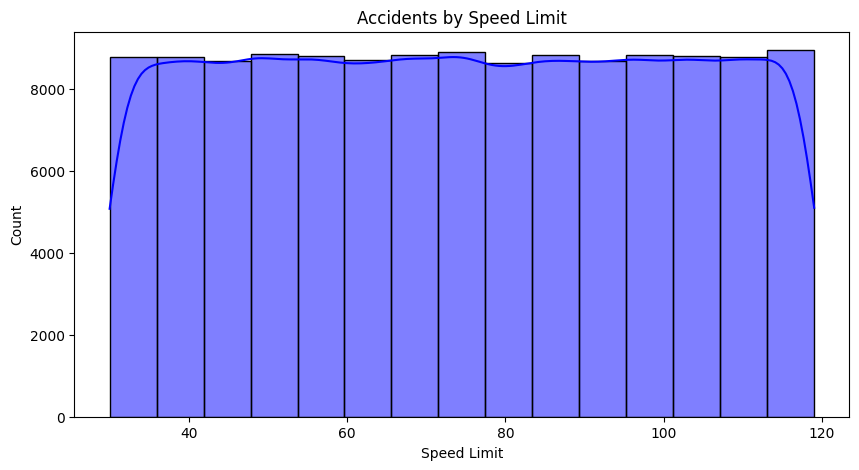

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Speed Limit'], bins=15, kde=True, color="blue")
plt.title("Accidents by Speed Limit")
plt.xlabel("Speed Limit")
plt.ylabel("Count")
plt.show()

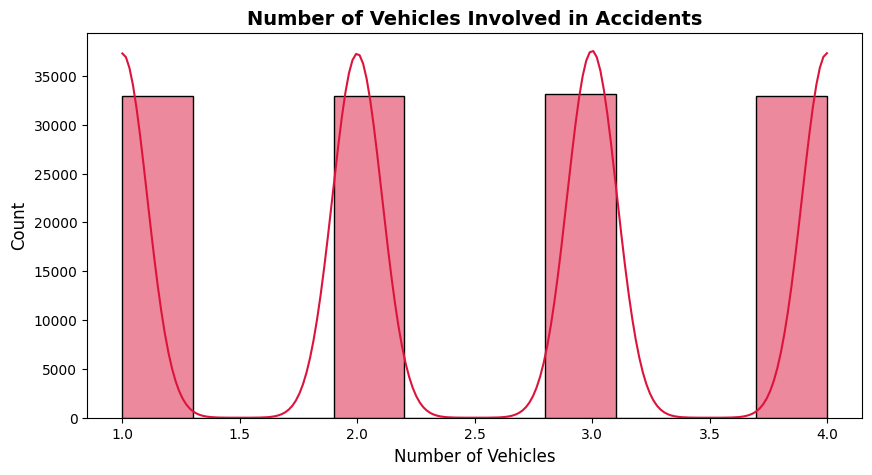

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Number of Vehicles Involved'], bins=10, kde=True, color="crimson")  
plt.title("Number of Vehicles Involved in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Number of Vehicles", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

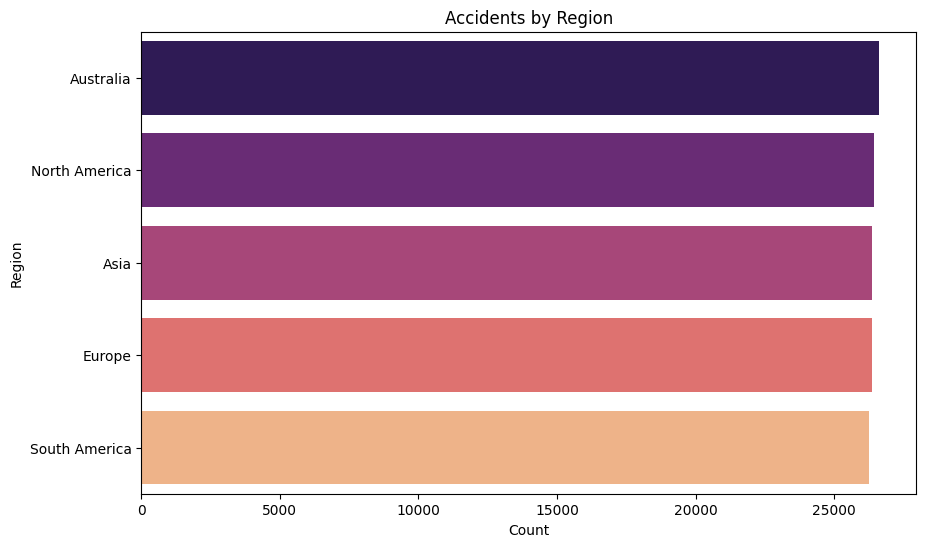

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Region'], order=df['Region'].value_counts().index, palette="magma")
plt.title("Accidents by Region")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

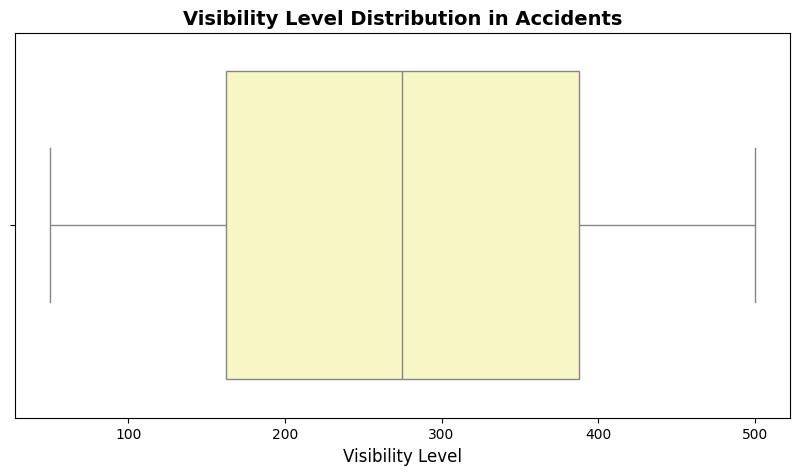

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Visibility Level"], palette="Spectral")
plt.title("Visibility Level Distribution in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Visibility Level", fontsize=12)
plt.show()

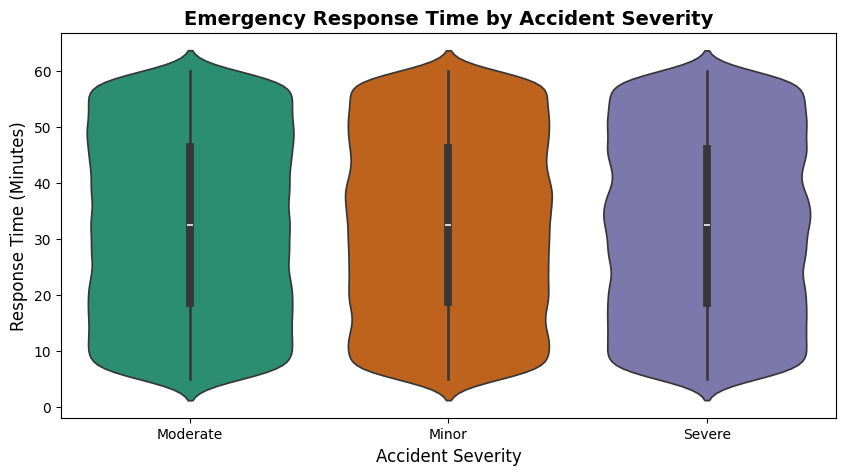

In [14]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Accident Severity"], y=df["Emergency Response Time"], palette="Dark2")
plt.title("Emergency Response Time by Accident Severity", fontsize=14, fontweight='bold')
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Response Time (Minutes)", fontsize=12)
plt.show()

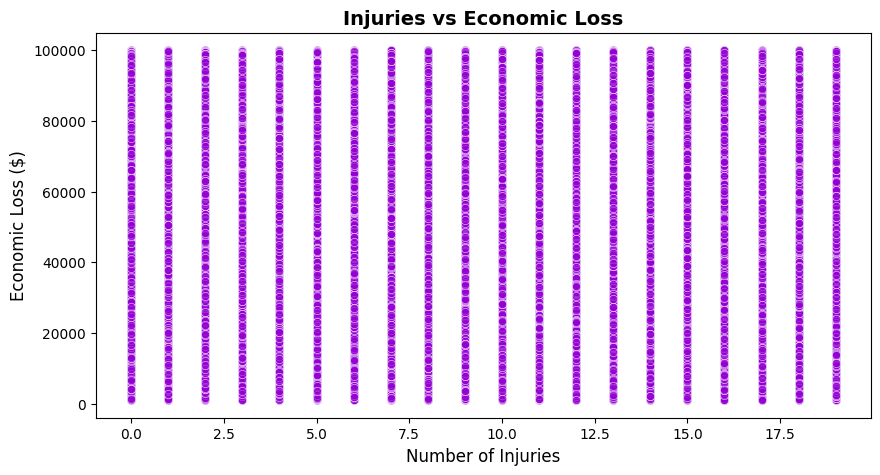

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Number of Injuries"], y=df["Economic Loss"], alpha=0.7, color="darkviolet")
plt.title("Injuries vs Economic Loss", fontsize=14, fontweight='bold')
plt.xlabel("Number of Injuries", fontsize=12)
plt.ylabel("Economic Loss ($)", fontsize=12)
plt.show()

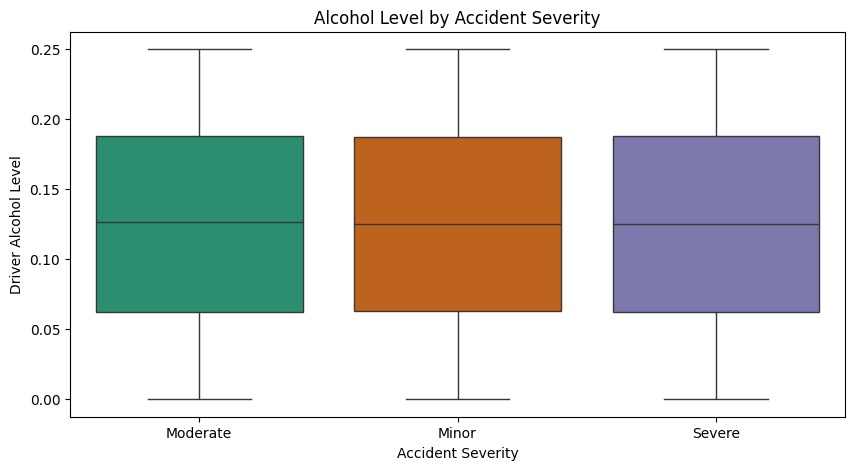

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Accident Severity"], y=df["Driver Alcohol Level"], palette="Dark2")
plt.title("Alcohol Level by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Driver Alcohol Level")
plt.show()

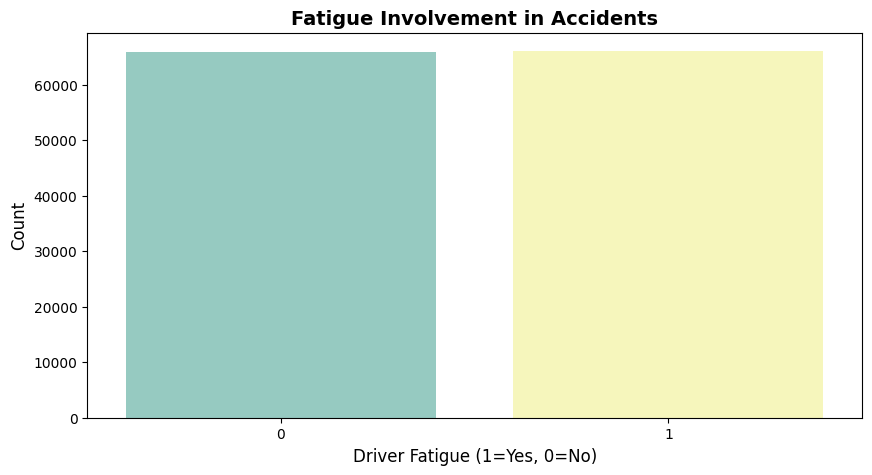

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Driver Fatigue"], palette="Set3")
plt.title("Fatigue Involvement in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Driver Fatigue (1=Yes, 0=No)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

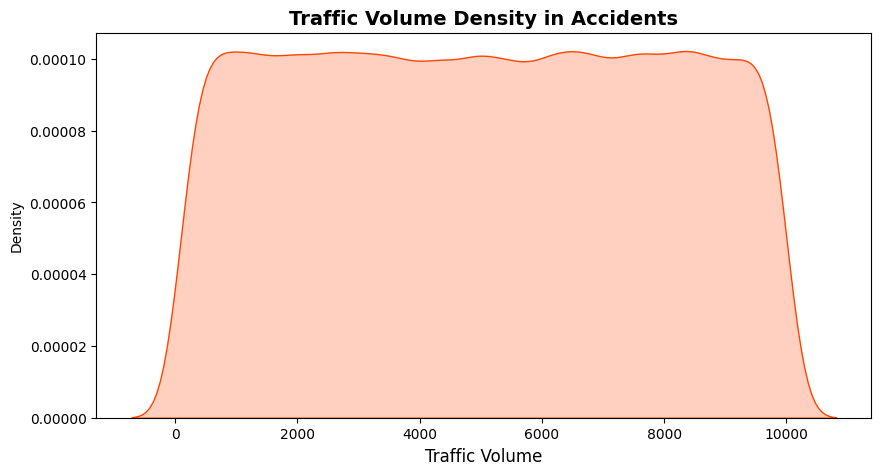

In [18]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Traffic Volume'], shade=True, color="orangered")
plt.title("Traffic Volume Density in Accidents", fontsize=14, fontweight='bold')
plt.xlabel("Traffic Volume", fontsize=12)
plt.show()

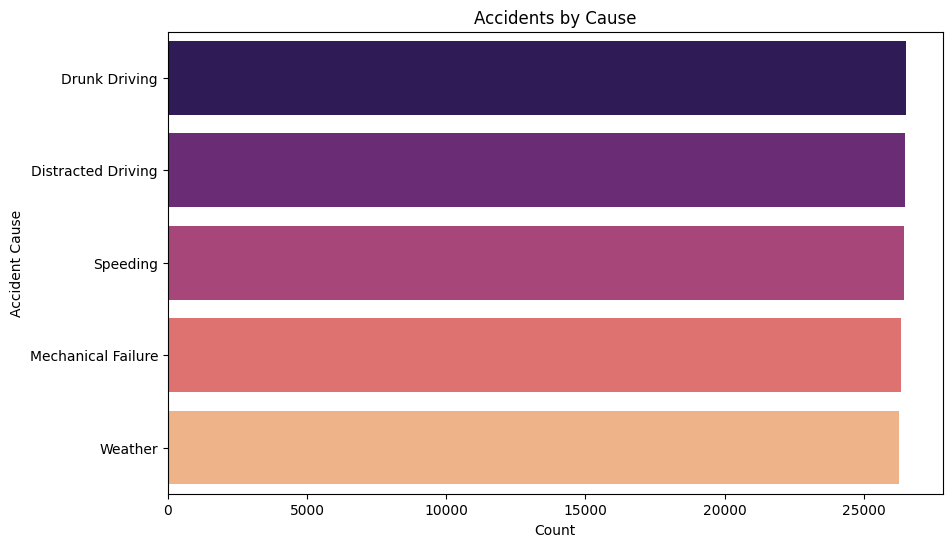

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df["Accident Cause"], order=df["Accident Cause"].value_counts().index, palette="magma")
plt.title("Accidents by Cause")
plt.xlabel("Count")
plt.ylabel("Accident Cause")
plt.show()

In [20]:
label_encoders = {}


categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
   
    original_values = df[column].unique()
    
 
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    
    encoded_values = df[column].unique()
    
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


Country Encoding and Decoding:
9 -> USA
8 -> UK
2 -> Canada
5 -> India
3 -> China
6 -> Japan
7 -> Russia
1 -> Brazil
4 -> Germany
0 -> Australia

Month Encoding and Decoding:
10 -> October
2 -> December
5 -> July
8 -> May
7 -> March
1 -> August
0 -> April
11 -> September
4 -> January
3 -> February
6 -> June
9 -> November

Day of Week Encoding and Decoding:
5 -> Tuesday
2 -> Saturday
3 -> Sunday
1 -> Monday
0 -> Friday
4 -> Thursday
6 -> Wednesday

Time of Day Encoding and Decoding:
1 -> Evening
0 -> Afternoon
3 -> Night
2 -> Morning

Urban/Rural Encoding and Decoding:
0 -> Rural
1 -> Urban

Road Type Encoding and Decoding:
2 -> Street
0 -> Highway
1 -> Main Road

Weather Conditions Encoding and Decoding:
4 -> Windy
3 -> Snowy
0 -> Clear
2 -> Rainy
1 -> Foggy

Driver Age Group Encoding and Decoding:
0 -> 18-25
2 -> 41-60
1 -> 26-40
4 -> <18
3 -> 61+

Driver Gender Encoding and Decoding:
1 -> Male
0 -> Female

Vehicle Condition Encoding and Decoding:
2 -> Poor
1 -> Moderate
0 -> Good

A

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      132000 non-null  int32  
 1   Year                         132000 non-null  int64  
 2   Month                        132000 non-null  int32  
 3   Day of Week                  132000 non-null  int32  
 4   Time of Day                  132000 non-null  int32  
 5   Urban/Rural                  132000 non-null  int32  
 6   Road Type                    132000 non-null  int32  
 7   Weather Conditions           132000 non-null  int32  
 8   Visibility Level             132000 non-null  float64
 9   Number of Vehicles Involved  132000 non-null  int64  
 10  Speed Limit                  132000 non-null  int64  
 11  Driver Age Group             132000 non-null  int32  
 12  Driver Gender                132000 non-null  int32  
 13 

In [22]:
X = df.drop(columns=['Accident Severity'])  
y = df['Accident Severity']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.33609848484848487
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.36      0.35      8751
           1       0.33      0.34      0.34      8767
           2       0.34      0.31      0.32      8882

    accuracy                           0.34     26400
   macro avg       0.34      0.34      0.34     26400
weighted avg       0.34      0.34      0.34     26400

Confusion Matrix:
[[3187 2893 2671]
 [3143 2970 2654]
 [3130 3036 2716]]


In [25]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)


lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.32890151515151517
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.45      0.38      8751
           1       0.33      0.29      0.31      8767
           2       0.33      0.24      0.28      8882

    accuracy                           0.33     26400
   macro avg       0.33      0.33      0.32     26400
weighted avg       0.33      0.33      0.32     26400

Confusion Matrix:
[[3974 2614 2163]
 [4039 2583 2145]
 [4195 2561 2126]]


In [26]:
dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.33147727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.34      0.33      8751
           1       0.33      0.33      0.33      8767
           2       0.33      0.33      0.33      8882

    accuracy                           0.33     26400
   macro avg       0.33      0.33      0.33     26400
weighted avg       0.33      0.33      0.33     26400

Confusion Matrix:
[[2941 2833 2977]
 [2974 2884 2909]
 [3010 2946 2926]]


In [27]:
knn_model = KNeighborsClassifier()


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.3380681818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.46      0.39      8751
           1       0.34      0.34      0.34      8767
           2       0.34      0.21      0.26      8882

    accuracy                           0.34     26400
   macro avg       0.34      0.34      0.33     26400
weighted avg       0.34      0.34      0.33     26400

Confusion Matrix:
[[4067 2933 1751]
 [3964 2999 1804]
 [4046 2977 1859]]


In [28]:
models = ['Random Forest', 'Logistic Regression', 'Decision Tree','KNN']
accuracies = [accuracy_score(y_test, rf_model.predict(X_test)),
              accuracy_score(y_test, lr_model.predict(X_test)),
              accuracy_score(y_test, dt_model.predict(X_test)),
              accuracy_score(y_test, knn_model.predict(X_test)),
             ]


model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(model_comparison)

                 Model  Accuracy
0        Random Forest  0.336098
1  Logistic Regression  0.328902
2        Decision Tree  0.331477
3                  KNN  0.338068
